## Breast Cancer Predition Model Using Logistic Regression

### Import Libraries

In [24]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [25]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


### Dataset Overview And Statistics

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [27]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### Data Preprocessing

In [28]:
df.isnull().sum()        # Step 1: Checking null values 

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [29]:
df.duplicated().sum()    # Step 2: Removing duplicate rows

np.int64(0)

### Exploratory Data Analysis And Visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

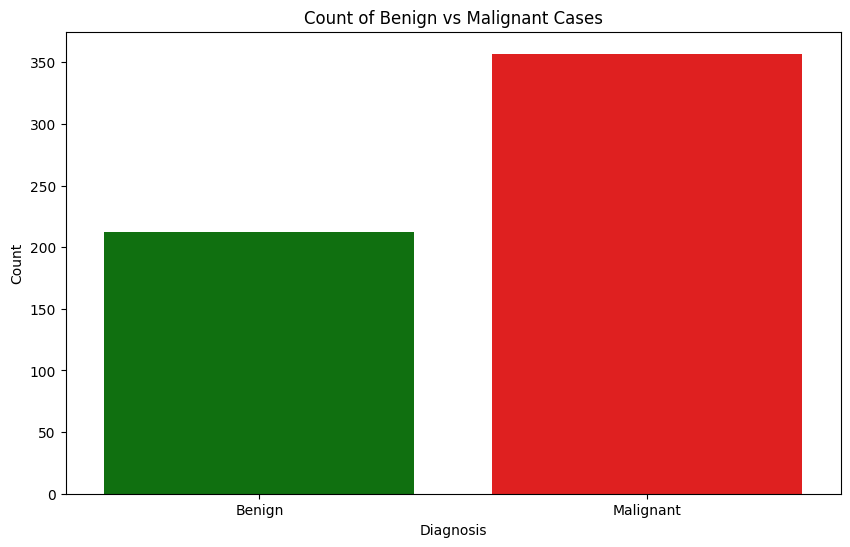

In [ ]:
# Convert diagnosis to categorical labels if not already done
df["diagnosis"] = df["diagnosis"].astype(int).map({1: "Malignant", 0: "Benign"})

# Count Plot Visualization - Benign vs. Malignant
plt.figure(figsize=(10, 6))
sns.countplot(x="diagnosis", data=df, palette = ["green", "red"])
plt.title("Count of Benign vs Malignant Cases")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

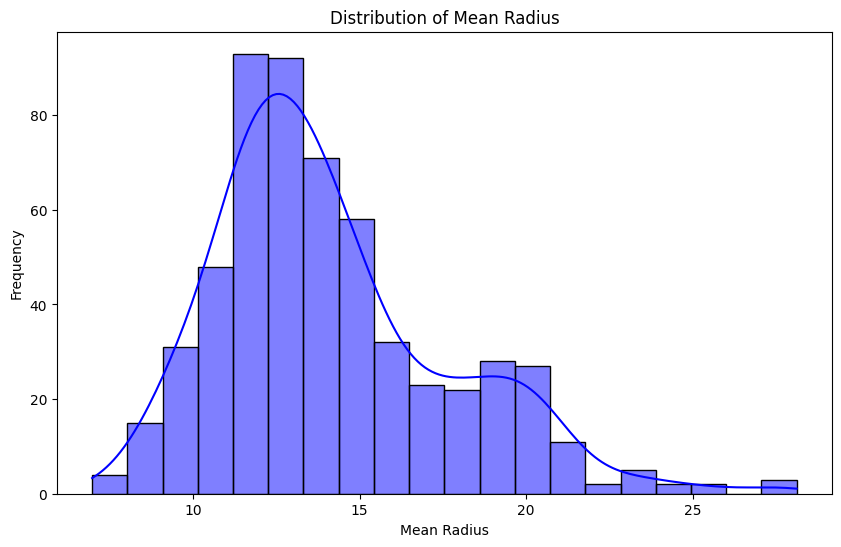

In [32]:
# Histogram Visualization of Numerical Feature
plt.figure(figsize=(10,6))
sns.histplot(df["mean_radius"], bins=20, kde=True, color="blue")
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()

### Model

In [33]:
# Import train/test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [34]:
# Seperate the dataset into 80-20 split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Import a model, e.g., Logistic Regression
from sklearn.linear_model import LogisticRegression

In [36]:
# Fitting Model to the dataset
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
# Checking Predictions of the Model
y_pred = model.predict(X_test)
y_pred 

array(['Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant',
 

### Model Evaluation

In [38]:
# Import metrics
from sklearn.metrics import accuracy_score

In [39]:
# Check Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy", accuracy)

Model Accuracy 0.9298245614035088


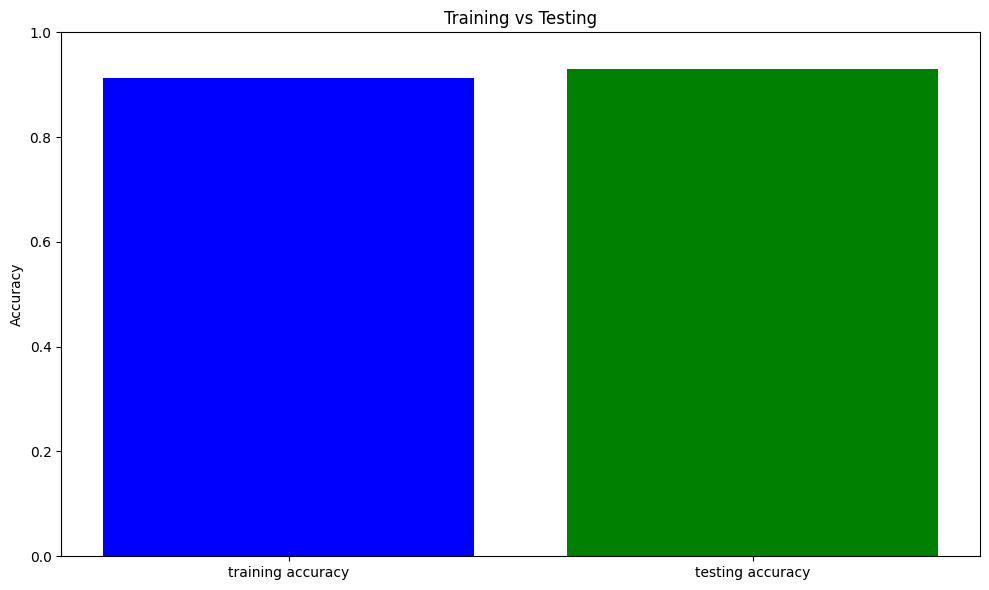

In [40]:
# Comparing Training & Testing Accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10,6))
plt.bar(["training accuracy", "testing accuracy"], [train_accuracy, test_accuracy], color=["blue", "green"])
plt.ylim(0, 1)
plt.title("Training vs Testing")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()